# 1-1-5 **경사하강법(gradient descent)**

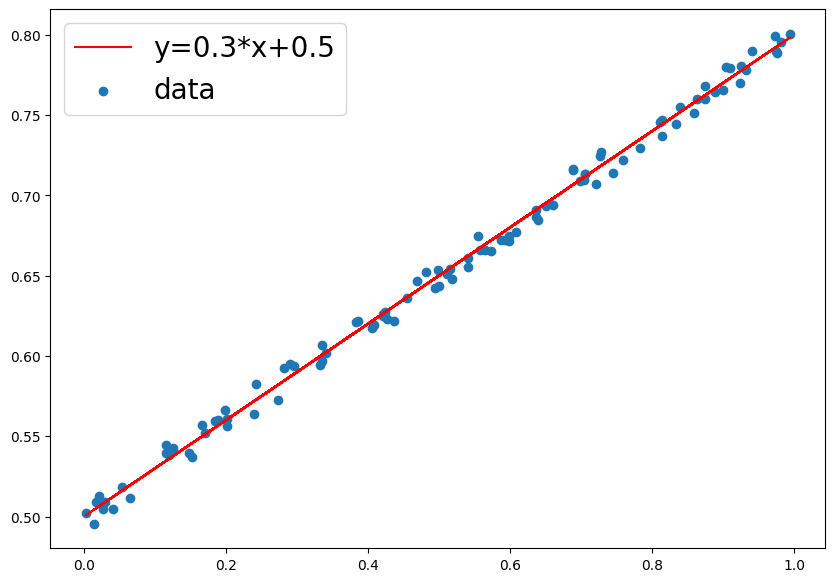

w: 0.3, b: 0.5


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# 샘플에 활용할 데이터셋 만들기
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
  x = np.random.rand(size)
  y = w * x + b
  noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
  yy = y + noise
  plt.figure(figsize=(10, 7))
  plt.plot(x, y, color='r', label=f'y={w}*x+{b}')
  plt.scatter(x,yy,label='data')
  plt.legend(fontsize=20)
  plt.show()
  print(f'w: {w}, b: {b}')
  return x, yy

x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

 0 w = 0.16403, b = 0.50889 error = 1.70304
 5 w = 0.20791, b = 0.54990 error = 0.03907
10 w = 0.22193, b = 0.54256 error = 0.02847
15 w = 0.23367, b = 0.53610 error = 0.02090
20 w = 0.24363, b = 0.53062 error = 0.01546
25 w = 0.25207, b = 0.52597 error = 0.01155
30 w = 0.25922, b = 0.52203 error = 0.00874
35 w = 0.26528, b = 0.51869 error = 0.00672
40 w = 0.27042, b = 0.51586 error = 0.00527
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
42 w = 0.27135, b = 0.51535 error = 0.00481


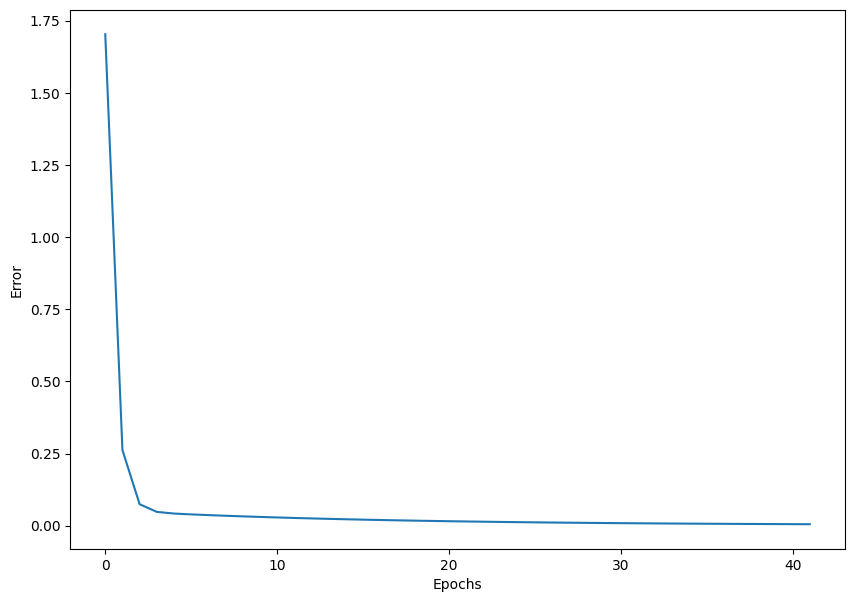

In [16]:
# Numpy로 최적화하는 과정을 구현하기

# 최대 반복 횟수
num_epoch = 1000

# 학습률(learning_rate)
learning_rate = 0.005

# 에러 기록
errors = []

# random 한 값으로 w, b를 초기화
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
  # Hypothesis 정의
  y_hat = w * x + b

  # Loss Function(손실 함수) 정의
  error = 0.5 * ((y_hat - y) ** 2).sum()
  if error < 0.005:
    break

  # Gradient 미분 계산
  w = w - learning_rate * ((y_hat - y) * x).sum()
  b = b - learning_rate * ((y_hat - y)).sum()

  errors.append(error)

  if epoch % 5 == 0:
    print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))


print(("------------" * 15))
print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))

plt.figure(figsize=(10, 7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

[1 2 3 4 5]
[ 5  8 11 14 17]


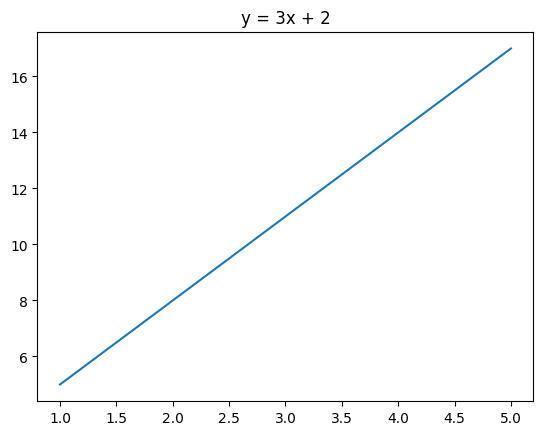

In [17]:
import matplotlib.pyplot as plt

# 샘플 데이터셋 생성
x = np.arange(1, 6)

# y = 3x + 2
y = 3 * x + 2
print(x)
print(y)

# 시각화
plt.plot(x, y)
plt.title('y = 3x + 2')
plt.show()

# 2-5-1 **모델 구조(Sequential API)**

In [18]:
import tensorflow as tf

# 리스트형
model = tf.keras.Sequential([
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(5),
        tf.keras.layers.Dense(1),
])

In [19]:
# add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

# 2-5-2 **입력 데이터 형태**



In [20]:
import tensorflow as tf
model = tf.keras.Sequential([
    # 입력 데이터의 shape=(150, 4)인 경우 input_shape 지정, 150개 샘플에 대하여 4개의 입력 변수가 존재함(행: 샘플 데이터, 열: 입력 변수)
    tf.keras.layers.Dense(10, input_shape=[4]),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 2-5-3 **단순선형회귀 모델 정의**

In [21]:
# 단순선형회귀 모델 생성

# 1차 함수식 y=wx + b 에서 입력 데이터는 x 값을 나타내는 입력 변수 1개만 존재하므로 input_shape=[1]로 지정
# 1개의 뉴런을 가지는 Dense 레이어는 1개의 출력 값을 가지므로 출력 값은 y에 대한 모델의 예측 값이다.
# Dense 레이어는 use_bias = True 가 기본 설정되어 상수항 b가 추가된다. use_bias = False 로 지정하면 상수항 b를 포함하지 않게 된다.
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=[1])
])

# 2-6 **모델 요약**

In [22]:
# 모델 요약
# 업데이트 파라미터가 가중치 w, 편향 b 2개로 Total params, Trainable params 역시 2개로 표기된다.
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

# 2-7 **컴파일**

In [25]:
# 긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error',
              metrics=['mean_squared_error', 'mean_absulute_error'])

# 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.005),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError(),
                       tf.keras.metrics.MeanSquaredError()
              ])

# 앞에서 정의한 단순선형회귀 모델을 훈련시키기 위하여
# 옵티마이저는 확률적 경사하강법(Stochastic Gradient Descent) 알고리즘인 'sgd',
# 손실함수로는 평균제곱오차(Mean Squared Error)인 'mse',
# 그리고 평가지표는 평균절대오차(Mean Absolute Error)인 'mae'를 지정한다.

# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

# 2-8 **훈련**

In [32]:
# 훈련
# 과소적합 상태
model.fit(x, y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 1.1303e-04 - mae: 0.0091
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 1.1228e-04 - mae: 0.0091
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 1.1152e-04 - mae: 0.0091
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 1.1077e-04 - mae: 0.0090
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 1.1001e-04 - mae: 0.0090


In [27]:
# 모델 인스턴스를 새로 생성하고 컴파일
# history 변수를 생성하고 fit() 메소드에 대한 반환값을 대입
# fit() 메소드가 반환하는 history 변수는 epoch별 훈련 손실과 평가 지표가 딕셔너리 형태로 저장

# 단순 선형회귀 모델 생성
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=[1])
])

# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

# 훈련
history = model.fit(x, y, epochs=1200)

Epoch 1/1200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step - loss: 50.5008 - mae: 6.7452
Epoch 2/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 29.5866 - mae: 5.2063
Epoch 3/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 17.3978 - mae: 4.0314
Epoch 4/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 10.2937 - mae: 3.1343
Epoch 5/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 6.1527 - mae: 2.4493
Epoch 6/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 3.7385 - mae: 1.9262
Epoch 7/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 2.3306 - mae: 1.5266
Epoch 8/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 1.5091 - mae: 1.2214
Epoch 9/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 1.0294 - mae: 0.9883
Epoch 10/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.7488 - mae: 0.8101
Epoch 11/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.5843 - mae: 0.6739
Epoch 12/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.4874 - mae: 0.5701
Epoch 13/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46m

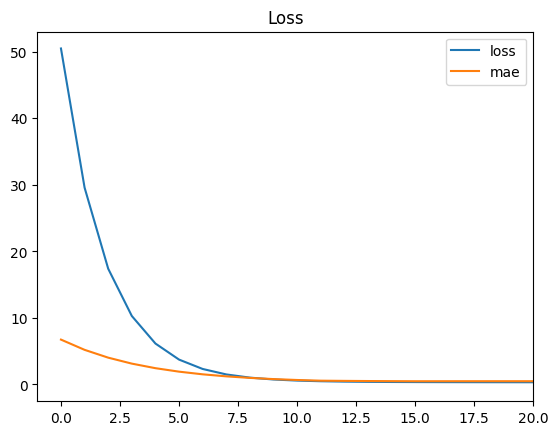

In [28]:
import matplotlib.pyplot as plt

# 20 epoch까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1, 20)
plt.title('Loss')
plt.legend()
plt.show()

# 2-9, 10 **검증 및 예측**

In [34]:
# 모델 인스턴스의 evalute() 메소드로 모델의 성능을 검증할 수 있다. 일반적으로 검증 데이터셋을 입력하여 검증한다.
# 별도의 검증 셋을 만들어 두지 않았으므로 훈련 데이터셋의 x, y를 사용하여 반환되는 결과를 확인한다.

# 검증
model.evaluate(x, y)

# 훈련이 완료된 모델 인스턴스의 predict() 메소드에 새로운 입력 데이터를 넣어 주면 모델의 예측 값을 얻을 수 있다.
# 예측을 위한 입력 x를 predict()의 인자로 지정한다.
# x 인자에 해당하는 값으로 숫자 10을 리스트 형태로 입력하였다.

# 책에서 설명한 코드인 model.predict([10]) 은 리스트를 Keras가 데이터 어댑터로 인식하지 못해서 에러가 발생했다.
# 이 문제는 아래와 같이 Numpy 배열로 변환하거나 Tensor로 변환해주면 해결된다.

# 예측
import numpy as np

model.predict(np.array([[10]], dtype=np.float32))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 1.0928e-04 - mae: 0.0090
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[32.043365]], dtype=float32)